In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

### Dataset information

In [2]:
train = tf.keras.utils.image_dataset_from_directory("train")
val = tf.keras.utils.image_dataset_from_directory("val")
test = tf.keras.utils.image_dataset_from_directory("test", label_mode=None)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 500 files.


In [3]:
print(train.class_names)
print(val.class_names)
print(test.class_names)

type(train)
type(test)
type(val)

['cat', 'dog']
['cat', 'dog']
None


tensorflow.python.data.ops.prefetch_op._PrefetchDataset

Train set:
  cat: 10000
  dog: 10000

Validation set:
  cat: 2500
  dog: 2500


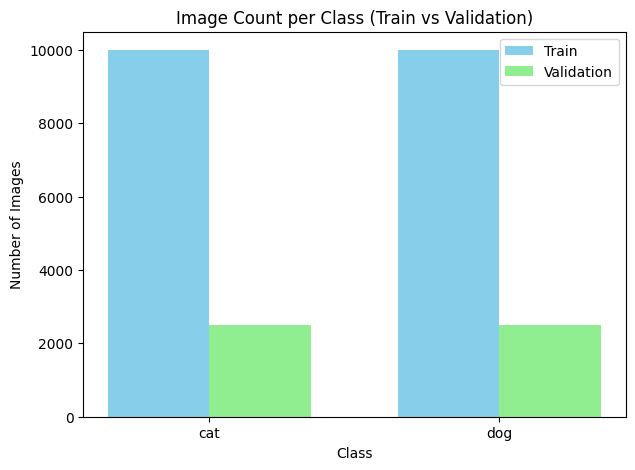

In [4]:
def count_classes(dataset):
    """Return class names and counts for a tf.data.Dataset."""
    labels = np.concatenate([y for x, y in dataset], axis=0)
    class_names = dataset.class_names
    counts = [np.sum(labels == i) for i in range(len(class_names))]
    return class_names, counts

# Count images per class in train and val
train_classes, train_counts = count_classes(train)
val_classes,   val_counts   = count_classes(val)

# Print results
print("Train set:")
for n, c in zip(train_classes, train_counts):
    print(f"  {n}: {c}")
print("\nValidation set:")
for n, c in zip(val_classes, val_counts):
    print(f"  {n}: {c}")

# Plot side-by-side
x = np.arange(len(train_classes))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, train_counts, width, label='Train', color='skyblue')
plt.bar(x + width/2, val_counts,   width, label='Validation', color='lightgreen')
plt.xticks(x, train_classes)
plt.title("Image Count per Class (Train vs Validation)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.legend()
plt.show()

### Image information

[Train] Total: 20000  H(min/max): 256/256  W(min/max): 256/256
[Validation] Total: 5000  H(min/max): 256/256  W(min/max): 256/256
[Test] Total: 500  H(min/max): 256/256  W(min/max): 256/256


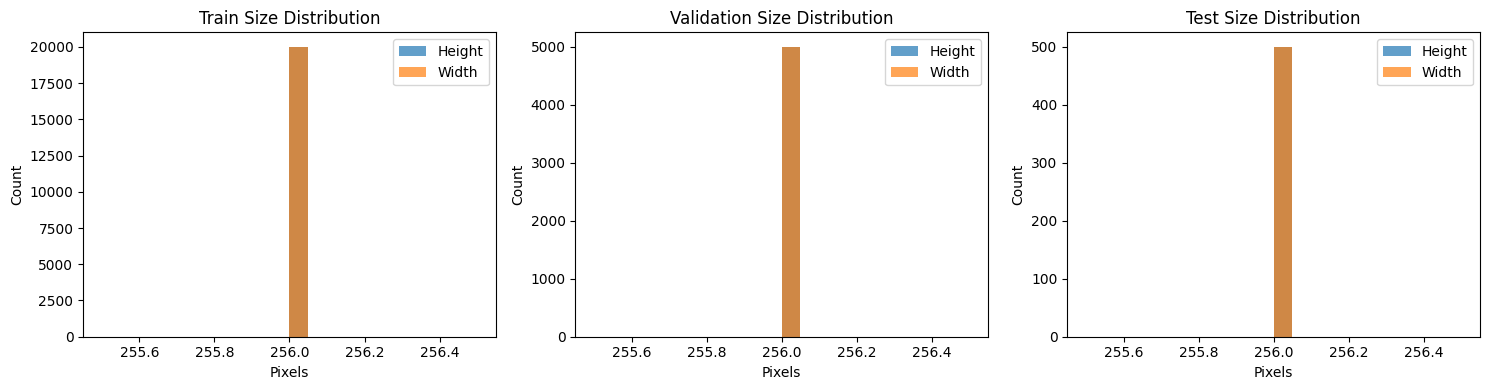

In [5]:
def get_image_sizes(ds):
    heights, widths = [], []
    for batch in ds:
        images = batch[0] if isinstance(batch, tuple) else batch  # handle (images, labels) or images
        for img in images:
            h, w = img.shape[:2]
            heights.append(int(h))
            widths.append(int(w))
    return heights, widths

def summarize_sizes(name, heights, widths):
    print(f"[{name}] Total: {len(heights)}  "
          f"H(min/max): {min(heights)}/{max(heights)}  "
          f"W(min/max): {min(widths)}/{max(widths)}")

splits = [("Train", train), ("Validation", val), ("Test", test)]
results = {name: get_image_sizes(ds) for name, ds in splits}

# Print stats
for name in ["Train", "Validation", "Test"]:
    h, w = results[name]
    summarize_sizes(name, h, w)

# Plot 1x3 matrix of histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=False, sharey=False)
for ax, (name, (heights, widths)) in zip(axes, results.items()):
    ax.hist(heights, bins=20, alpha=0.7, label="Height")
    ax.hist(widths,  bins=20, alpha=0.7, label="Width")
    ax.set_title(f"{name} Size Distribution")
    ax.set_xlabel("Pixels")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

Original shape: (256, 256, 3)
Resized shape: (128, 128, 3)


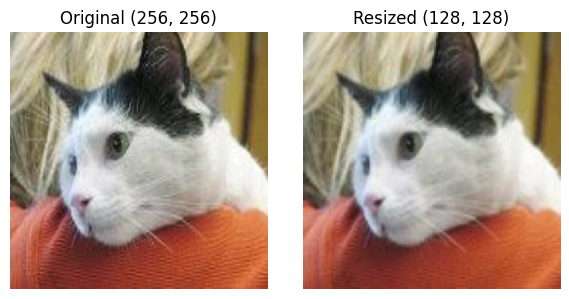

In [6]:
TARGET_SIZE = (128, 128)
INDEX = 0

# 取出一个 batch
images, labels = next(iter(train)) 
img  = images[INDEX] 

print("Original shape:", img.shape)          # 原图张量尺寸

# Resize
resized = tf.image.resize(img, TARGET_SIZE, method='bicubic', antialias=True)

print("Resized shape:", resized.shape)

# 可视化对比
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img.numpy().astype("uint8"))
plt.title(f"Original (256, 256)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(resized.numpy().astype("uint8"))
plt.title(f"Resized {TARGET_SIZE}")
plt.axis("off")

plt.tight_layout()
plt.show()